In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("csv/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


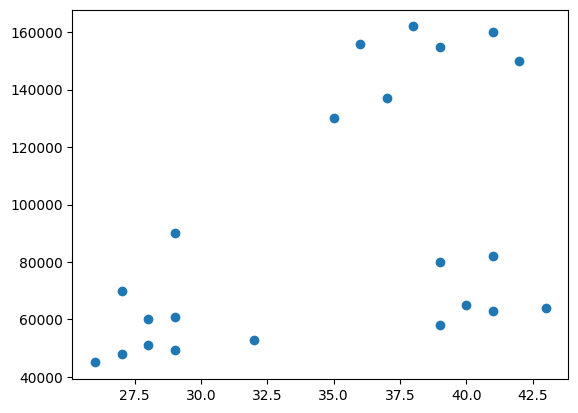

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [10]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [12]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [14]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

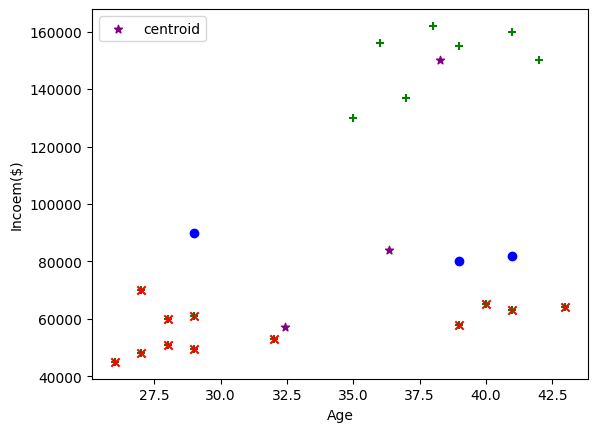

In [26]:
plt.scatter(df['Age'], df['Income($)'], color="green", marker="+")
plt.scatter(df2['Age'], df2['Income($)'], color="red", marker="x")
plt.scatter(df3['Age'], df3['Income($)'], color="blue", marker="o")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")

plt.xlabel("Age")
plt.ylabel("Incoem($)")
plt.legend()

In [31]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [34]:
scaler.fit(df[["Age"]])
df.Age = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [36]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[["Age", "Income($)"]])
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [38]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

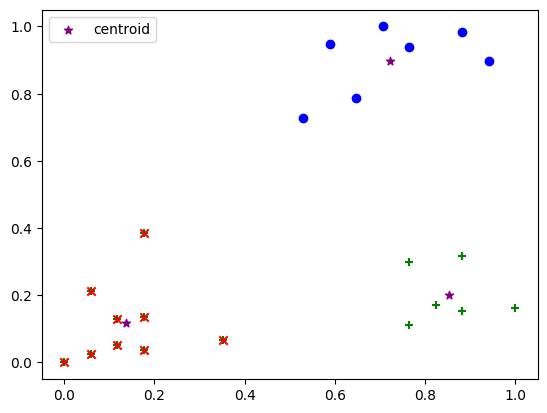

In [39]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df['Age'], df['Income($)'], color="green", marker="+")
plt.scatter(df2['Age'], df2['Income($)'], color="red", marker="x")
plt.scatter(df3['Age'], df3['Income($)'], color="blue", marker="o")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend()

In [40]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

In [41]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.4028477025733998,
 0.3071350418475291,
 0.22443334487241415,
 0.20882373373648921,
 0.13265419827245162,
 0.11304517838728051]

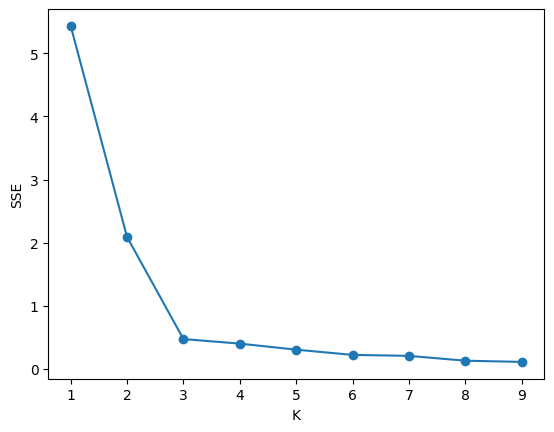

In [42]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng, sse, marker="o")